In [1]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file
data = pd.read_csv('data.csv')

In [3]:
#inspecting the data
data.shape

(99999, 27)

In [4]:
data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [5]:
#checking for missing values
data.isna().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

#### There are no missing values in the data set

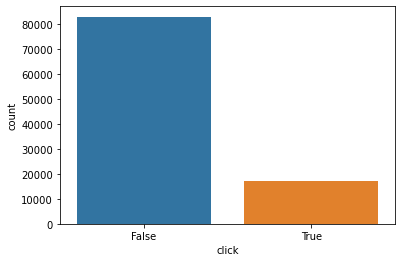

In [6]:
#Checking the imbalance 
sns.countplot(x='click',data=data)
plt.show();

In [7]:
data['click'].value_counts()/len(data)

False    0.830198
True     0.169802
Name: click, dtype: float64

#### 83% is not clicked and 17% is getting cicked

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [9]:
catcol =  ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']

In [10]:
print('Unique counts of categorical columns')
for i in catcol:
    print(i , len(data[i].unique()))

Unique counts of categorical columns
site_id 1485
site_domain 1331
site_category 19
app_id 1354
app_domain 96
app_category 21
device_id 16801
device_ip 78013
device_model 3145


#### All these columns have a lot of unique values so one hot encoding is not a good method. We will be using label encoding instead and we will drop a few unnecessary columns.

In [11]:
data.drop(['device_ip','device_id',], axis=1, inplace=True)

In [12]:
numcol =  ['click','C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'dayofweek','month', 'day', 'hour', 'y']

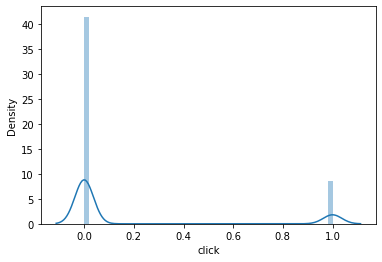

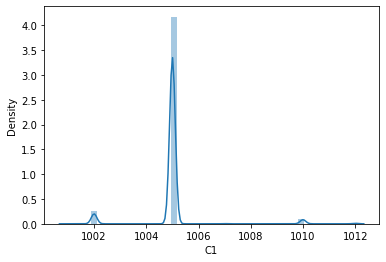

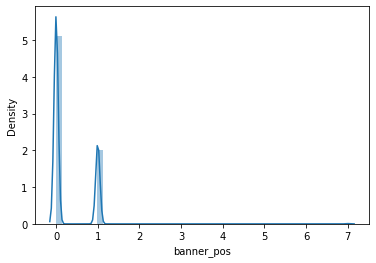

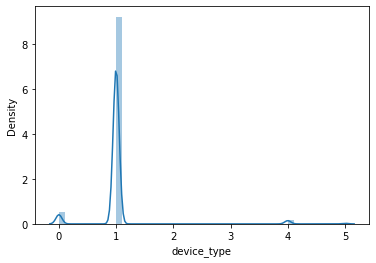

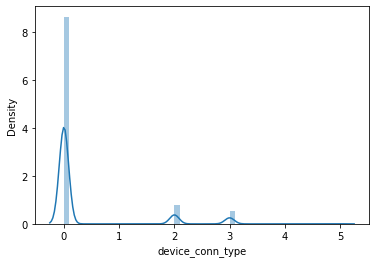

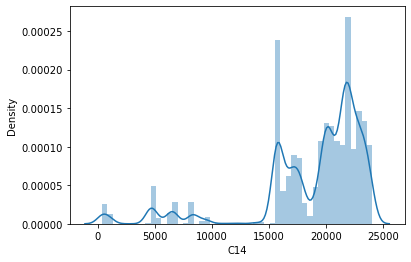

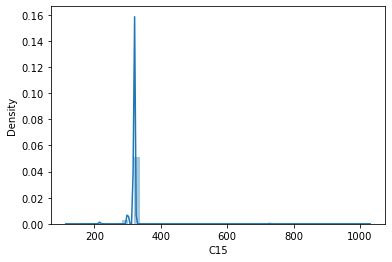

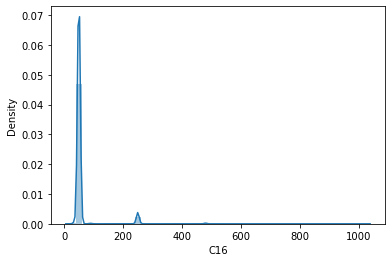

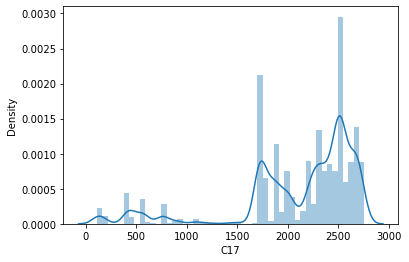

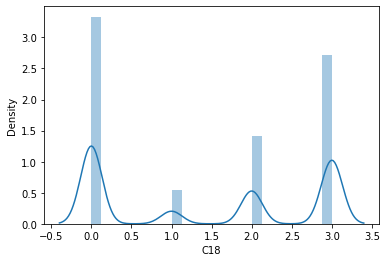

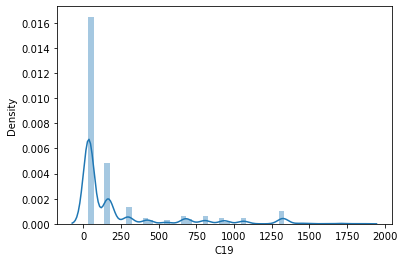

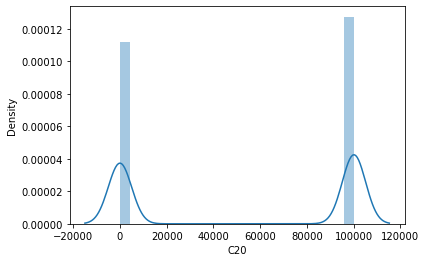

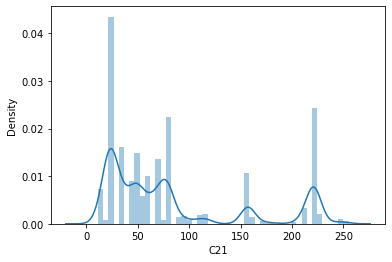

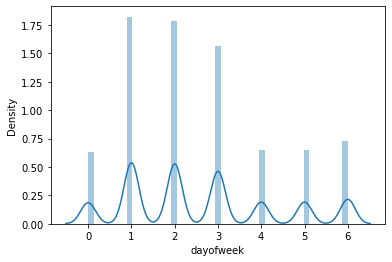

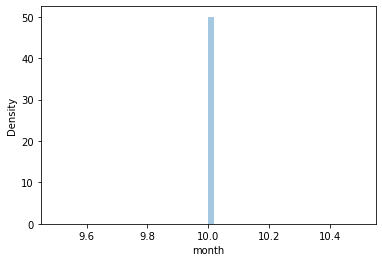

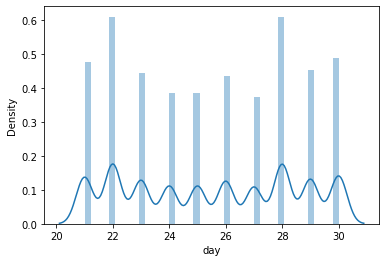

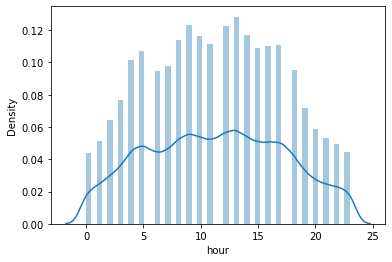

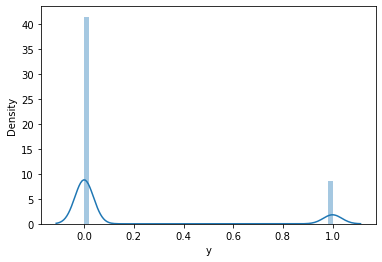

In [13]:
for i in numcol:
    sns.distplot(data[i])
    plt.show()

#### Y and Click represent the same data, so we will drop Y. Month will aslo be dropped as the data spans over the same month. 
#### Banner pos, device_conn_type, C15, C16 and C20 are heavily around certain values. C20 also has a lot of negative values as well so it's better to drop it.

In [14]:
data.drop(['click','month','C20'], axis=1, inplace=True)

In [15]:
data.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,83.163542,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,70.161076,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,23.000000,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,61.000000,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,101.000000,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,255.000000,6.000000,30.000000,23.000000,1.000000


#### C15, C16, C19 and C21 have heavy outliers so we will deal with it by capping the values.

In [16]:
c = ['C15', 'C16', 'C19', 'C21']
for i in c:
    percentiles = data[i].quantile(0.99)
    if data[i].quantile(0.99) < 0.5 * data[i].max():
        data[i][data[i] >= percentiles] = percentiles

In [17]:
data.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,317.998540,59.598856,2114.613036,1.439904,227.234932,83.163542,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,10.364193,42.891568,607.469442,1.326824,351.472366,70.161076,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,23.000000,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,61.000000,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,101.000000,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,320.000000,250.000000,2757.000000,3.000000,1839.000000,255.000000,6.000000,30.000000,23.000000,1.000000


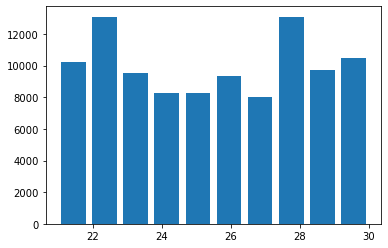

In [18]:
#Train Test Split
plt.hist(data.day, rwidth=0.8)
plt.show()

In [19]:
#For training we are talking data from 21st to 27th, the last three days are for testing
train = data[data['day']<=27]
test = data[data['day']>27]

In [20]:
train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,...,C15,C16,C17,C18,C19,C21,dayofweek,day,hour,y
1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,1b13b020,1,...,320,50,1934,2,39,16,2,22,19,1
2,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,9a45a8e8,1,...,320,50,2552,3,167,23,3,23,18,0
3,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,ea6abc60,0,...,320,50,2478,3,167,23,2,22,19,0
4,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,36d749e5,1,...,320,50,1722,0,35,79,1,21,8,1
8,1005,0,85f751fd,c4e18dd6,50e219e0,fc6dc16f,5c5a694b,0f2161f8,b4d21d55,1,...,320,50,2340,3,41,159,5,25,15,0


In [21]:
test.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,...,C15,C16,C17,C18,C19,C21,dayofweek,day,hour,y
0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,be6db1d7,1,...,320,50,2528,0,39,221,1,28,14,0
5,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,84ebbcd4,1,...,320,50,1993,2,1063,33,3,30,17,0
6,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,07d7df22,03683bd4,1,...,320,50,2680,3,815,42,3,30,7,0
7,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,f51246a7,1,...,320,50,2371,0,559,46,3,30,10,0
19,1005,0,85f751fd,c4e18dd6,50e219e0,ce183bbd,ae637522,cef3e649,36b67a2a,1,...,320,50,2597,1,167,71,1,28,8,0


In [22]:
#Encoding the necessary columns
from sklearn.preprocessing import LabelEncoder 
import category_encoders as ce

In [23]:
X = data.drop(['y'], axis = 1)
y = data['y']

In [24]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
0,1005,1,0.034043,0.034043,0.176707,0.197227,0.194074,0.198258,0.189474,1,...,22683,320,50,2528,0,39,221,1,28,14
1,1005,1,0.296498,0.258816,0.176707,0.197227,0.194074,0.198258,0.276074,1,...,17037,320,50,1934,2,39,16,2,22,19
2,1005,0,0.052133,0.034853,0.205942,0.197227,0.194074,0.198258,0.097858,1,...,22155,320,50,2552,3,167,23,3,23,18
3,1002,0,0.136212,0.138826,0.131223,0.197227,0.194074,0.198258,0.189147,0,...,21591,320,50,2478,3,167,23,2,22,19
4,1005,0,0.202875,0.202875,0.205942,0.197227,0.194074,0.198258,0.224832,1,...,15708,320,50,1722,0,35,79,1,21,8


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)

#### Before we use the three classifications methods we will create a baseline model for evaluating them 

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier

In [27]:
#First we need to create some functions 
def model_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    return accuracy, cnf_matrix

In [28]:
def cross_val (model, x, y, folds):
    crossvalidation = cross_val_score(model, x, y, cv= folds, n_jobs=-1)
    return crossvalidation

In [29]:
def store_results(name, ytrain, xtrain, ytest, xtest, model, folds):
    
    crossvalidation = cross_val(model, xtrain, ytrain, folds)
    
    accuracy_test, cm1 =  model_eval(model, xtrain, ytrain)
    TP = cm1[1,1]  
    TN = cm1[0,0] 
    FP = cm1[0,1] 
    FN = cm1[1,0] 
    recall_test = TP / (TP+FP)
    precision_test = TP / (TP+FN)
    
    accuracy_train, cm1 =  model_eval(model, xtest, ytest)
    TP = cm1[1,1]  
    TN = cm1[0,0] 
    FP = cm1[0,1] 
    FN = cm1[1,0] 
    recall_train = TP / (TP+FP)
    precision_train = TP / (TP+FN)

    entry = {'Model': [name],
          'Accuracy_train': [accuracy_train],
          'recall_train': [recall_train],
          'precision_train': [precision_train],
          'Accuracy_test': [accuracy_train],
          'recall_test': [recall_train],
          'precision_test': [precision_train],
          'CrossVal_Mean': [crossvalidation.mean()],           
          'CrossVal1': [crossvalidation[0]],
          'CrossVal2': [crossvalidation[1]],
          'CrossVal3': [crossvalidation[2]],
          'CrossVal4': [crossvalidation[3]],
          'CrossVal5': [crossvalidation[4]],
          }
    result = pd.DataFrame(entry)
    return result

In [30]:
#Now lets create the baseline model
result = pd.DataFrame()
dummy_clf = DummyClassifier(strategy= "most_frequent")
dummy_clf.fit(X_train, y_train)
accuracy, cnf_matrix  = model_eval(dummy_clf, X_train, y_train)
print(accuracy)
print(cnf_matrix)
temp = store_results("Dummy classifier", y_train, X_train, y_test, X_test, dummy_clf, 5)
result = result.append(temp)
result

0.8301975742510608
[[58113     0]
 [11886     0]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.8302,NaN,0.0,0.8302,NaN,0.0,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202


#### The three methods I used are Logistic regression, Decision Trees and Random Forest
#### Logistic regression is being used for explainibility and finiding linear relationship
#### Decision tree is being used for explainibility and non-linear relationship
#### Random forest is being used for accuracy and improving the model

#### 1. Logistic Regression

In [31]:
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,1005,1,0.034966,0.040000,0.176707,0.197227,0.194074,0.198258,0.189474,1,...,18856,320,50,1882,3,35,13,6,26,5
16863,1005,0,0.457701,0.460559,0.284168,0.197227,0.194074,0.198258,0.211702,1,...,17654,300,250,1994,2,39,33,1,28,3
88091,1005,1,0.296498,0.258816,0.176707,0.197227,0.194074,0.198258,0.282108,1,...,22811,320,50,2647,2,35,23,1,28,18
75881,1005,0,0.121093,0.125555,0.131223,0.297804,0.143101,0.106158,0.225269,1,...,20346,300,250,2331,2,39,23,3,23,6
61015,1005,1,0.152871,0.152871,0.094972,0.197227,0.194074,0.198258,0.269710,1,...,21767,320,50,2506,0,35,157,2,22,12


In [32]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,0.363636,0.142857,0.047056,0.062072,0.286169,0.337196,0.355506,0.711083,0.294997,0.2,...,0.780843,1.0,0.130435,0.669187,1.000000,0.001107,0.047244,1.000000,0.555556,0.217391
16863,0.363636,0.000000,0.618256,0.716988,0.477756,0.337196,0.355506,0.711083,0.332384,0.2,...,0.730057,0.9,1.000000,0.711531,0.666667,0.003322,0.125984,0.166667,0.777778,0.130435
88091,0.363636,0.142857,0.400440,0.402824,0.286169,0.337196,0.355506,0.711083,0.450803,0.2,...,0.947947,1.0,0.130435,0.958412,0.666667,0.001107,0.086614,0.166667,0.777778,0.782609
75881,0.363636,0.000000,0.163431,0.195303,0.205078,0.509151,0.248902,0.303838,0.355203,0.2,...,0.843798,0.9,1.000000,0.838941,0.666667,0.003322,0.086614,0.500000,0.222222,0.260870
61015,0.363636,0.142857,0.206370,0.237841,0.140449,0.337196,0.355506,0.711083,0.429951,0.2,...,0.903836,1.0,0.130435,0.905104,0.000000,0.001107,0.614173,0.333333,0.111111,0.521739


In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
94821,0.818182,0.142857,0.163431,0.195303,0.205078,0.087260,0.355506,0.303838,0.176680,0.8,...,0.860909,1.0,0.130435,0.674102,0.0,0.358804,0.393701,0.666667,0.333333,0.956522
50031,0.363636,0.000000,0.163431,0.195303,0.205078,0.101655,0.110500,0.303838,0.020803,0.2,...,0.920483,1.0,0.130435,0.920983,1.0,0.500554,0.236220,0.500000,0.222222,0.956522
43776,0.363636,0.142857,0.316784,0.365092,0.286169,0.337196,0.355506,0.711083,0.208515,0.2,...,0.827066,1.0,0.130435,0.638185,1.0,0.074197,0.086614,0.833333,0.444444,0.782609
60357,0.363636,0.142857,0.337091,0.388495,0.286169,0.337196,0.355506,0.711083,0.208515,0.2,...,0.668962,1.0,0.130435,0.638185,1.0,0.074197,0.086614,0.666667,0.333333,0.434783
91629,0.363636,0.000000,0.163431,0.195303,0.205078,0.101655,0.110500,0.303838,0.059224,0.2,...,0.689116,1.0,0.130435,0.370510,1.0,0.430786,0.236220,0.333333,0.888889,0.739130


In [35]:
y_pred = model.predict(X_test)
accuracy, cnf_matrix = model_eval(model, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("Logistic regression", y_train, X_train, y_test, X_test, model, 5)
result = result.append(temp)
result

0.8323333333333334
[[24522   384]
 [ 4646   448]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830200,NaN,0.000000,0.830200,NaN,0.000000,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic regression,0.832333,0.538462,0.087947,0.832333,0.538462,0.087947,0.833483,0.833071,0.834000,0.833571,0.833357,0.833417


#### Logistic Regression is performing almost the same as our baseline classifier

#### 2. Decision Tree

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,1005,1,0.034966,0.040000,0.176707,0.197227,0.194074,0.198258,0.189474,1,...,18856,320,50,1882,3,35,13,6,26,5
16863,1005,0,0.457701,0.460559,0.284168,0.197227,0.194074,0.198258,0.211702,1,...,17654,300,250,1994,2,39,33,1,28,3
88091,1005,1,0.296498,0.258816,0.176707,0.197227,0.194074,0.198258,0.282108,1,...,22811,320,50,2647,2,35,23,1,28,18
75881,1005,0,0.121093,0.125555,0.131223,0.297804,0.143101,0.106158,0.225269,1,...,20346,300,250,2331,2,39,23,3,23,6
61015,1005,1,0.152871,0.152871,0.094972,0.197227,0.194074,0.198258,0.269710,1,...,21767,320,50,2506,0,35,157,2,22,12


In [37]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_preds = dt.predict(X_test)
accuracy, cnf_matrix = model_eval(dt, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("Decision tree", y_train, X_train, y_test, X_test, dt, 5)
result = result.append(temp)
result

0.7557666666666667
[[21168  3738]
 [ 3589  1505]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830200,NaN,0.000000,0.830200,NaN,0.000000,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic regression,0.832333,0.538462,0.087947,0.832333,0.538462,0.087947,0.833483,0.833071,0.834000,0.833571,0.833357,0.833417
0,Decision tree,0.755767,0.287049,0.295446,0.755767,0.287049,0.295446,0.755682,0.757429,0.758429,0.748500,0.759143,0.754911


#### As we can see decision tree is worse than logistic regression, it has lower values in all metrics

#### 3. Random Forest

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)
X_train.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,...,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,1005,1,0.034966,0.040000,0.176707,0.197227,0.194074,0.198258,0.189474,1,...,18856,320,50,1882,3,35,13,6,26,5
16863,1005,0,0.457701,0.460559,0.284168,0.197227,0.194074,0.198258,0.211702,1,...,17654,300,250,1994,2,39,33,1,28,3
88091,1005,1,0.296498,0.258816,0.176707,0.197227,0.194074,0.198258,0.282108,1,...,22811,320,50,2647,2,35,23,1,28,18
75881,1005,0,0.121093,0.125555,0.131223,0.297804,0.143101,0.106158,0.225269,1,...,20346,300,250,2331,2,39,23,3,23,6
61015,1005,1,0.152871,0.152871,0.094972,0.197227,0.194074,0.198258,0.269710,1,...,21767,320,50,2506,0,35,157,2,22,12


In [39]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)
accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("Random forest", y_train, X_train, y_test, X_test, model_rf, 5)
result = result.append(temp)
result

0.8134
[[23405  1501]
 [ 4097   997]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830200,NaN,0.000000,0.830200,NaN,0.000000,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic regression,0.832333,0.538462,0.087947,0.832333,0.538462,0.087947,0.833483,0.833071,0.834000,0.833571,0.833357,0.833417
0,Decision tree,0.755767,0.287049,0.295446,0.755767,0.287049,0.295446,0.755682,0.757429,0.758429,0.748500,0.759143,0.754911
0,Random forest,0.813400,0.399119,0.195720,0.813400,0.399119,0.195720,0.813297,0.812500,0.815786,0.812357,0.812286,0.813558


#### Random forest performed pretty close to Logistic regression but Logistic regression reigned supreme

#### Now its time to use these methods again but this time with feature selection

Text(0.5, 1.05, 'Pearson correlation of Features')

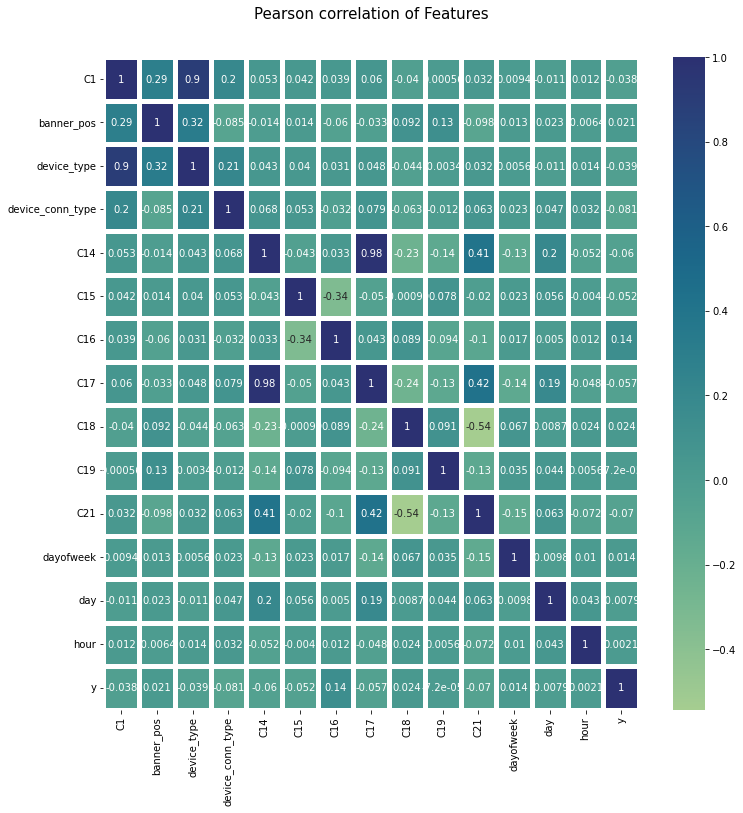

In [40]:
corr = data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, ax=ax, annot=True, linewidths=5,cmap='crest')
plt.title("Pearson correlation of Features", y=1.05, size=15)

#### C1 and device_type are higly corerlated, C14 and C17 are also very highly corelated. Therefore we are gonna drop C1 and C14

In [41]:
data.drop(['C14', 'C1'], axis=1, inplace= True)

In [42]:
X = data.drop(['y'], axis=1)
y = data['y']

In [43]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head()

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
0,1,0.034043,0.034043,0.176707,0.197227,0.194074,0.198258,0.189474,1,0,320,50,2528,0,39,221,1,28,14
1,1,0.296498,0.258816,0.176707,0.197227,0.194074,0.198258,0.276074,1,0,320,50,1934,2,39,16,2,22,19
2,0,0.052133,0.034853,0.205942,0.197227,0.194074,0.198258,0.097858,1,0,320,50,2552,3,167,23,3,23,18
3,0,0.136212,0.138826,0.131223,0.197227,0.194074,0.198258,0.189147,0,0,320,50,2478,3,167,23,2,22,19
4,0,0.202875,0.202875,0.205942,0.197227,0.194074,0.198258,0.224832,1,0,320,50,1722,0,35,79,1,21,8


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.3, random_state= 42)

#### Now it's time to do the classification methods again 

#### 1. Logistic regression

In [45]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,0.142857,0.047056,0.062072,0.286169,0.337196,0.355506,0.711083,0.294997,0.2,0.0,1.0,0.130435,0.669187,1.000000,0.001107,0.047244,1.000000,0.555556,0.217391
16863,0.000000,0.618256,0.716988,0.477756,0.337196,0.355506,0.711083,0.332384,0.2,0.0,0.9,1.000000,0.711531,0.666667,0.003322,0.125984,0.166667,0.777778,0.130435
88091,0.142857,0.400440,0.402824,0.286169,0.337196,0.355506,0.711083,0.450803,0.2,0.0,1.0,0.130435,0.958412,0.666667,0.001107,0.086614,0.166667,0.777778,0.782609
75881,0.000000,0.163431,0.195303,0.205078,0.509151,0.248902,0.303838,0.355203,0.2,0.0,0.9,1.000000,0.838941,0.666667,0.003322,0.086614,0.500000,0.222222,0.260870
61015,0.142857,0.206370,0.237841,0.140449,0.337196,0.355506,0.711083,0.429951,0.2,0.0,1.0,0.130435,0.905104,0.000000,0.001107,0.614173,0.333333,0.111111,0.521739


In [46]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69979
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27887.
Date:                Mon, 26 Jun 2023   Deviance:                       55774.
Time:                        03:50:20   Pearson chi2:                 6.84e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.0335      0.253    -19.910      0.000      -5.529      -4.538
banner_pos           0.2399      0.175      1.368      0.171      -0.104       0.584
site_id              3.0307      0.213     14.240      0.000       2.614       3.448
site_domain          1.7362      0.207      8.368      0.000       1.330       2.143
site_category       -0.0507      0.183     -0.277      0.782      -0.409       0.307
app_id               6.9582      0.182     38.332      0.000       6.602       7.314
app_domain          -1.8900      0.205     -9.242      0.000      -2.291      -1.489
app_category        -1.2741      0.087    -14.704      0.000      -1.444      -1.104
device_model         3.3747      0.114     29.626      0.000       3.151       3.598
device_type          0.3745      0.143      2.626      0.009       0.095       0.654
device_conn_type     0.3024      0.092      3.275      0.001       0.121       0.483
C15                  0.7094      0.230      3.086      0.002       0.259       1.160
C16                 -0.4258      0.072     -5.889      0.000      -0.568      -0.284
C17                 -0.1973      0.051     -3.869      0.000      -0.297      -0.097
C18                 -0.1409      0.032     -4.368      0.000      -0.204      -0.078
C19                  0.1578      0.054      2.914      0.004       0.052       0.264
C21                 -0.1797      0.053     -3.366      0.001      -0.284      -0.075
dayofweek            0.0319      0.038      0.845      0.398      -0.042       0.106
day                 -0.0498      0.034     -1.480      0.139      -0.116       0.016
hour                -0.1087      0.042     -2.608      0.009      -0.190      -0.027
====================================================================================
"""

In [47]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[57315   798]
 [10845  1041]]
0.8336690524150345


In [48]:
def sm_model_evaluation (model, x_test, y_test):
    X_sm = sm.add_constant(x_test)
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)

In [49]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
sm_model_evaluation(res, X_test, y_test)  

0.8323
[[24516   390]
 [ 4641   453]]


In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,506.78
3,site_domain,7.80
2,site_id,7.64
5,app_id,3.14
6,app_domain,2.98
7,app_category,2.55
4,site_category,1.76
16,C21,1.71
12,C16,1.69
14,C18,1.55


In [51]:
# Hour and day have the lowest VIF so we will remove them
X_train_sm.drop(['hour','day'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69981
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27892.
Date:                Mon, 26 Jun 2023   Deviance:                       55783.
Time:                        03:50:21   Pearson chi2:                 6.83e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.0837      0.252    -20.199      0.000      -5.577      -4.590
banner_pos           0.2410      0.175      1.374      0.169      -0.103       0.585
site_id              3.0212      0.212     14.223      0.000       2.605       3.438
site_domain          1.7340      0.207      8.370      0.000       1.328       2.140
site_category       -0.0431      0.183     -0.236      0.814      -0.401       0.315
app_id               6.9437      0.181     38.262      0.000       6.588       7.299
app_domain          -1.8558      0.204     -9.084      0.000      -2.256      -1.455
app_category        -1.2818      0.087    -14.799      0.000      -1.452      -1.112
device_model         3.3746      0.114     29.631      0.000       3.151       3.598
device_type          0.3618      0.142      2.541      0.011       0.083       0.641
device_conn_type     0.3013      0.092      3.264      0.001       0.120       0.482
C15                  0.6890      0.229      3.005      0.003       0.240       1.138
C16                 -0.4255      0.072     -5.887      0.000      -0.567      -0.284
C17                 -0.2070      0.050     -4.138      0.000      -0.305      -0.109
C18                 -0.1431      0.032     -4.437      0.000      -0.206      -0.080
C19                  0.1549      0.054      2.865      0.004       0.049       0.261
C21                 -0.1728      0.053     -3.243      0.001      -0.277      -0.068
dayofweek            0.0325      0.038      0.861      0.389      -0.041       0.106
====================================================================================
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,500.21
3,site_domain,7.80
2,site_id,7.64
5,app_id,3.14
6,app_domain,2.96
7,app_category,2.55
4,site_category,1.76
16,C21,1.71
12,C16,1.69
14,C18,1.55


In [53]:
X_train_sm.drop(['dayofweek', 'C15'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69983
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27897.
Date:                Mon, 26 Jun 2023   Deviance:                       55794.
Time:                        03:50:22   Pearson chi2:                 6.83e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.3652      0.093    -46.961      0.000      -4.547      -4.183
banner_pos           0.2262      0.175      1.289      0.197      -0.118       0.570
site_id              3.0141      0.212     14.218      0.000       2.599       3.430
site_domain          1.7282      0.207      8.358      0.000       1.323       2.133
site_category       -0.0398      0.183     -0.218      0.827      -0.398       0.318
app_id               6.9544      0.181     38.357      0.000       6.599       7.310
app_domain          -1.8752      0.204     -9.189      0.000      -2.275      -1.475
app_category        -1.2752      0.086    -14.756      0.000      -1.445      -1.106
device_model         3.3597      0.114     29.532      0.000       3.137       3.583
device_type          0.3858      0.142      2.718      0.007       0.108       0.664
device_conn_type     0.3069      0.092      3.326      0.001       0.126       0.488
C16                 -0.4894      0.069     -7.084      0.000      -0.625      -0.354
C17                 -0.2148      0.050     -4.316      0.000      -0.312      -0.117
C18                 -0.1450      0.032     -4.496      0.000      -0.208      -0.082
C19                  0.1625      0.054      3.008      0.003       0.057       0.268
C21                 -0.1861      0.053     -3.507      0.000      -0.290      -0.082
====================================================================================
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.54
3,site_domain,7.80
2,site_id,7.64
5,app_id,3.14
6,app_domain,2.96
7,app_category,2.54
4,site_category,1.76
15,C21,1.69
11,C16,1.58
13,C18,1.55


#### Done with VIF and P values, now to find the best threshold for classifications

In [55]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[57322   791]
 [10832  1054]]
0.8339547707824397


In [56]:
col = list(X_train_sm.columns)
col.remove('const')
sm_model_evaluation(res, X_test[col], y_test)  

0.8322333333333334
[[24513   393]
 [ 4640   454]]


In [57]:
numbers = [float(x)/20 for x in range(20)]
print(numbers)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
53023,0,0.068080,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16863,1,0.480490,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
88091,0,0.386929,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
75881,1,0.409029,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61015,0,0.200270,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
cutoff_df = pd.DataFrame( columns = ['Thresold_prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    accuracy = (TP + TN)/total1
    
    recall = TP / (TP+FP)
    precision = TP / (TP+FN)
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
cutoff_df

,Thresold_prob,accuracy,recall,precision
0.00,0.00,0.169802,0.169802,1.000000
0.05,0.05,0.318247,0.196058,0.972405
0.10,0.10,0.502050,0.239711,0.889870
0.15,0.15,0.613709,0.276490,0.788575
0.20,0.20,0.714967,0.322194,0.614841
0.25,0.25,0.774668,0.366288,0.447922
0.30,0.30,0.806540,0.411140,0.322312
0.35,0.35,0.821969,0.453186,0.234562
0.40,0.40,0.829626,0.495211,0.173986
0.45,0.45,0.832612,0.531100,0.121403


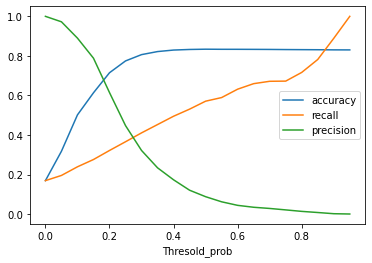

In [59]:
cutoff_df.plot.line(x='Thresold_prob', y=['accuracy','recall','precision'])
plt.show()

In [60]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.50 else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
53023,0,0.068080,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16863,1,0.480490,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
88091,0,0.386929,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
75881,1,0.409029,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61015,0,0.200270,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X_train_sm.drop('const', axis= 1, inplace= True)
X_test = X_test[X_train_sm.columns]
print(X_train_sm.shape)
print(X_test.shape)

(69999, 15)
(30000, 15)


In [62]:
model = LogisticRegression()
model.fit(X_train_sm, y_train)
accuracy, cnf_matrix = model_eval(model, X_test[X_train_sm.columns], y_test)
temp = store_results("Logistic regression with feature engine", y_train, X_train_sm, y_test, X_test[X_train_sm.columns], \
                     model, 5)
result = result.append(temp)
result

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830200,NaN,0.000000,0.830200,NaN,0.000000,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic regression,0.832333,0.538462,0.087947,0.832333,0.538462,0.087947,0.833483,0.833071,0.834000,0.833571,0.833357,0.833417
0,Decision tree,0.755767,0.287049,0.295446,0.755767,0.287049,0.295446,0.755682,0.757429,0.758429,0.748500,0.759143,0.754911
0,Random forest,0.813400,0.399119,0.195720,0.813400,0.399119,0.195720,0.813297,0.812500,0.815786,0.812357,0.812286,0.813558
0,Logistic regression with feature engine,0.832367,0.539016,0.088143,0.832367,0.539016,0.088143,0.833398,0.832571,0.834000,0.833714,0.833214,0.833488


#### 2. Decision tree

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.3, random_state= 42)
X_train.head()

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,1,0.034966,0.040000,0.176707,0.197227,0.194074,0.198258,0.189474,1,0,320,50,1882,3,35,13,6,26,5
16863,0,0.457701,0.460559,0.284168,0.197227,0.194074,0.198258,0.211702,1,0,300,250,1994,2,39,33,1,28,3
88091,1,0.296498,0.258816,0.176707,0.197227,0.194074,0.198258,0.282108,1,0,320,50,2647,2,35,23,1,28,18
75881,0,0.121093,0.125555,0.131223,0.297804,0.143101,0.106158,0.225269,1,0,300,250,2331,2,39,23,3,23,6
61015,1,0.152871,0.152871,0.094972,0.197227,0.194074,0.198258,0.269710,1,0,320,50,2506,0,35,157,2,22,12


In [64]:
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train, y_train)
feature_importances = dt_tree.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
7,device_model,0.267587
18,hour,0.231708
1,site_id,0.122201
17,day,0.068376
16,dayofweek,0.062322
12,C17,0.060399
4,app_id,0.041503
14,C19,0.032192
2,site_domain,0.029524
15,C21,0.028772


In [65]:
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)

In [66]:
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train[rf_cols], y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
dt_tree =  DecisionTreeClassifier(max_depth=14, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)
dt_tree.fit(X_train, y_train)
accuracy, cnf_matrix = model_eval(dt_tree, X_test, y_test)
temp = store_results("Decision tree with feature engine", y_train, X_train, y_test, X_test, \
                     dt_tree, 5)
result = result.append(temp)
result

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830200,NaN,0.000000,0.830200,NaN,0.000000,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic regression,0.832333,0.538462,0.087947,0.832333,0.538462,0.087947,0.833483,0.833071,0.834000,0.833571,0.833357,0.833417
0,Decision tree,0.755767,0.287049,0.295446,0.755767,0.287049,0.295446,0.755682,0.757429,0.758429,0.748500,0.759143,0.754911
0,Random forest,0.813400,0.399119,0.195720,0.813400,0.399119,0.195720,0.813297,0.812500,0.815786,0.812357,0.812286,0.813558
0,Logistic regression with feature engine,0.832367,0.539016,0.088143,0.832367,0.539016,0.088143,0.833398,0.832571,0.834000,0.833714,0.833214,0.833488
0,Decision tree with feature engine,0.833933,0.541854,0.142324,0.833933,0.541854,0.142324,0.827383,0.827929,0.828429,0.826286,0.827714,0.826559


#### 3. Random forest

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.3, random_state= 42)
X_train.head()

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,1,0.034966,0.040000,0.176707,0.197227,0.194074,0.198258,0.189474,1,0,320,50,1882,3,35,13,6,26,5
16863,0,0.457701,0.460559,0.284168,0.197227,0.194074,0.198258,0.211702,1,0,300,250,1994,2,39,33,1,28,3
88091,1,0.296498,0.258816,0.176707,0.197227,0.194074,0.198258,0.282108,1,0,320,50,2647,2,35,23,1,28,18
75881,0,0.121093,0.125555,0.131223,0.297804,0.143101,0.106158,0.225269,1,0,300,250,2331,2,39,23,3,23,6
61015,1,0.152871,0.152871,0.094972,0.197227,0.194074,0.198258,0.269710,1,0,320,50,2506,0,35,157,2,22,12


In [69]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
7,device_model,0.304916
18,hour,0.238805
1,site_id,0.066824
17,day,0.058922
2,site_domain,0.058895
12,C17,0.052831
16,dayofweek,0.051904
4,app_id,0.037972
14,C19,0.029331
15,C21,0.026096


In [70]:
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)
        
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
print(rf_cols)

print(len(rf_cols))
predict_rf = model_rf.predict(X_train)
predict_rf_test = model_rf.predict(X_test)

accuracy, cnf_matrix = model_eval(model_rf, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)



['site_id', 'site_domain', 'app_id', 'device_model', 'C17', 'C19', 'C21', 'dayofweek', 'day', 'hour']
10
Train results
accuracy 0.973271046729239
cnf_matrix 
 [[57750   363]
 [ 1508 10378]]
Test results
accuracy 0.8100333333333334
cnf_matrix 
 [[23273  1633]
 [ 4066  1028]]


In [71]:
temp = store_results("Random Forest with feature engine", y_train, X_train, y_test, X_test, \
                     model_rf, 5)
result = result.append(temp)
result

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.830200,NaN,0.000000,0.830200,NaN,0.000000,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic regression,0.832333,0.538462,0.087947,0.832333,0.538462,0.087947,0.833483,0.833071,0.834000,0.833571,0.833357,0.833417
0,Decision tree,0.755767,0.287049,0.295446,0.755767,0.287049,0.295446,0.755682,0.757429,0.758429,0.748500,0.759143,0.754911
0,Random forest,0.813400,0.399119,0.195720,0.813400,0.399119,0.195720,0.813297,0.812500,0.815786,0.812357,0.812286,0.813558
0,Logistic regression with feature engine,0.832367,0.539016,0.088143,0.832367,0.539016,0.088143,0.833398,0.832571,0.834000,0.833714,0.833214,0.833488
0,Decision tree with feature engine,0.833933,0.541854,0.142324,0.833933,0.541854,0.142324,0.827383,0.827929,0.828429,0.826286,0.827714,0.826559
0,Random Forest with feature engine,0.810033,0.386321,0.201806,0.810033,0.386321,0.201806,0.808726,0.810286,0.810214,0.807143,0.807929,0.808058


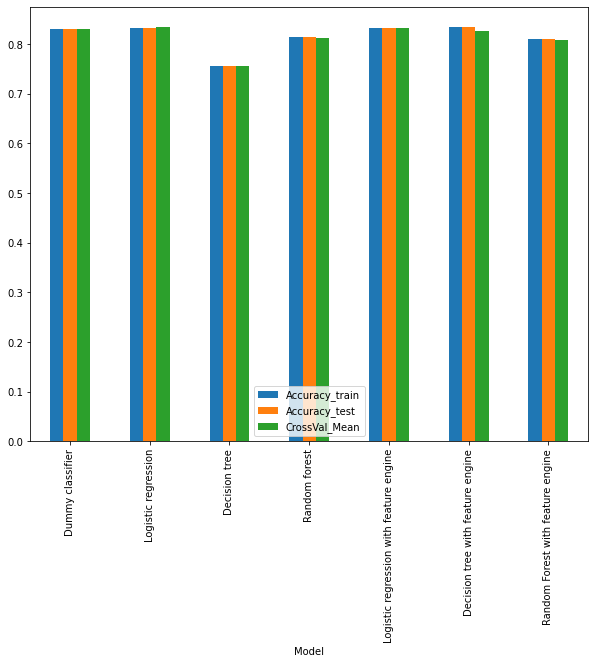

In [72]:
plt.rcParams["figure.figsize"] = (10,8)
result.plot(x='Model', y=['Accuracy_train','Accuracy_test','CrossVal_Mean'], kind="bar")
plt.xticks(rotation=90)
plt.show()

#### It seems that Decision tree with feature engineering is the best model but very closely followed by Logistic regression with feature engineering